In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Datos/datos_pre_analisis.csv')

In [20]:

#Creamos el enconder para transformar en números los datos
clase_LabelEncoder = LabelEncoder()
puesto = clase_LabelEncoder.fit_transform(df["Puesto"]) # En este ejemplo estoy usando fit_transform()
df['Puesto']=puesto
expertise = clase_LabelEncoder.fit_transform(df["Expertise"]) # En este ejemplo estoy usando fit_transform()
df['Expertise']=expertise
ubicacion = clase_LabelEncoder.fit_transform(df["Ubicación"]) 
df['Ubicación']= ubicacion
servicios = clase_LabelEncoder.fit_transform(df["Servicios"]) 
df['Servicios']= servicios
habilidades = clase_LabelEncoder.fit_transform(df["Habilidades"]) 
df['Habilidades']= habilidades
herramientas = clase_LabelEncoder.fit_transform(df["Herramientas"]) 
df['Herramientas']= herramientas
educacion = clase_LabelEncoder.fit_transform(df["Educación"]) 
df['Educación']= educacion

# Eliminamos las columnas con una alta presencia de Nan's
df = df.drop(columns=['Título','Empresa','Modalidad','Sector','Descripción','Otro Idioma','EntornoTEC','Beneficios'])

# Una vez tenemos definida nuestra tabla, procedemos a crear una matriz para el Train-Test:
X = np.array(df.drop("Puesto", axis = 1))

y = np.array(df["Puesto"])

X.shape, y.shape

# Procedemos con este:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Ahora, realizamos el modelo de NNN para sacar la valía del clustering:

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

X_train

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

# Con esto sacamos el modelo predictivo y lo imputamos, sacando también su precisión:
X_test = x_scaler.transform(X_test)

yhat = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 0.5333333333333333


## Tenemos una precisión baja, por lo que intentemos ajustar el modelo haciendo grupos en los puestos de trabajo:

In [ ]:
df = pd.read_csv('Datos/Datos_pre_analisis.csv')

In [41]:
# Creamos un diccionario para clasificar
grupos_trabajo = {
    'Data Analyst': 'Data Analysts',
    'Data Analytics': 'Data Analysts',
    'Data Developer': 'Data Scientists',
    'Data Engineer': 'Data Scientists',
    'Data Expert': 'Data Scientists',
    'Data Scientist': 'Data Scientists',
    'Data Specialist': 'Data Scientists',
    'Business Intelligence': 'Consultants',
    'Consultant': 'Consultants',
    'Project Manager': 'Consultants',
    'AI Innovation Architect': 'AI & Others',
    'Machine Learning Engineer': 'AI & Others',
    'Other': 'AI & Others'
}

df['Puesto_grupos'] = df['Puesto'].map(grupos_trabajo).fillna('Unknown')

print(df)

                                           Título                     Puesto  \
0                                    data analyst               Data Analyst   
1                   business intelligence analyst      Business Intelligence   
2                                research analyst               Data Analyst   
3        senior program manager analyst relations               Data Analyst   
4                                    data analyst               Data Analyst   
..                                            ...                        ...   
744                      data engineering manager              Data Engineer   
745              senior machine learning engineer  Machine Learning Engineer   
746                      data engineering manager              Data Engineer   
747  it stibo step inhouse product data developer             Data Developer   
748  it stibo step inhouse product data developer             Data Developer   

     sueldo_min  sueldo_max Expertise E

In [42]:
#Creamos el enconder para transformar en números los datos
clase_LabelEncoder = LabelEncoder()
puesto_grupos = clase_LabelEncoder.fit_transform(df["Puesto_grupos"]) 
df['Puesto_grupos'] = puesto_grupos
expertise = clase_LabelEncoder.fit_transform(df["Expertise"]) 
df['Expertise']=expertise
ubicacion = clase_LabelEncoder.fit_transform(df["Ubicación"]) 
df['Ubicación']= ubicacion
servicios = clase_LabelEncoder.fit_transform(df["Servicios"]) 
df['Servicios']= servicios
habilidades = clase_LabelEncoder.fit_transform(df["Habilidades"]) 
df['Habilidades']= habilidades
herramientas = clase_LabelEncoder.fit_transform(df["Herramientas"]) 
df['Herramientas']= herramientas
educacion = clase_LabelEncoder.fit_transform(df["Educación"]) 
df['Educación']= educacion

# Eliminamos las columnas con una alta presencia de Nan's
df = df.drop(columns=['Título','Empresa','Modalidad','Sector','Descripción','Otro Idioma','EntornoTEC','Beneficios','Puesto'])

# Una vez tenemos definida nuestra tabla, procedemos a crear una matriz para el Train-Test:
X = np.array(df.drop("Puesto_grupos", axis = 1))

y = np.array(df["Puesto_grupos"])

X.shape, y.shape

# Procedemos con este:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Ahora, realizamos el modelo de NNN para sacar la valía del clustering:

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

X_train

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

# Con esto sacamos el modelo predictivo y lo imputamos, sacando también su precisión:
X_test = x_scaler.transform(X_test)

yhat = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 0.5866666666666667


In [25]:
model.predict_proba(X_test)

array([[0.        , 0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.        , 0.66666667, 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        ,

In [43]:
model.kneighbors([X_test[0]])

(array([[0.26055984, 0.2827257 , 0.51158355]]), array([[359, 466, 315]]))

In [27]:
df

,sueldo_min,sueldo_max,Expertise,Ubicación,Servicios,Habilidades,Herramientas,Educación,sueldo_medio,Puesto_grupos
0,50000,70000,3,2,587,77,63,0,60000.0,2
1,50000,70000,3,2,398,29,97,0,60000.0,1
2,30000,50000,3,2,285,40,67,6,40000.0,2
3,50000,70000,4,2,355,77,98,0,60000.0,2
4,50000,70000,3,2,417,40,63,0,60000.0,2
...,...,...,...,...,...,...,...,...,...,...
744,30000,50000,4,1,615,77,98,6,40000.0,3
745,50000,70000,4,1,615,77,98,6,60000.0,0
746,30000,50000,4,1,490,75,98,0,40000.0,3
747,50000,70000,3,1,236,77,98,6,60000.0,3


# Clustering

In [44]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [45]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       3, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [46]:
kmeans.cluster_centers_

array([[3.00000000e+04, 5.00000000e+04, 3.00823045e+00, 1.26337449e+00,
        3.74954733e+02, 6.79094650e+01, 7.81481481e+01, 3.84773663e+00,
        4.00000000e+04],
       [5.00000000e+04, 7.00000000e+04, 3.03747073e+00, 1.58313817e+00,
        3.44754098e+02, 6.06814988e+01, 7.68524590e+01, 4.07259953e+00,
        6.00000000e+04],
       [7.00000000e+04, 9.00000000e+04, 3.36538462e+00, 1.40384615e+00,
        3.76326923e+02, 6.22307692e+01, 7.06153846e+01, 3.92307692e+00,
        8.00000000e+04],
       [9.00000000e+04, 1.10000000e+05, 2.92592593e+00, 1.29629630e+00,
        4.22074074e+02, 6.74444444e+01, 7.29629630e+01, 5.14814815e+00,
        1.00000000e+05]])

In [47]:
kmeans.inertia_

30440364.808716666

In [48]:
inercias = list() 
  
for k in range(1, 11): 
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)    
    
    inercias.append(kmeans.inertia_) 
    
inercias

[453560229199.6207,
 165383989143.5166,
 21357060448.226326,
 30440364.808716666,
 17733370.743186116,
 10232417.63343421,
 8147441.098935662,
 6464794.281083683,
 4687409.216589172,
 3830984.615964759]

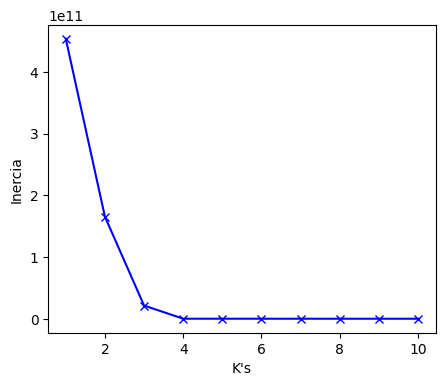

In [35]:
plt.figure(figsize = (5, 4))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

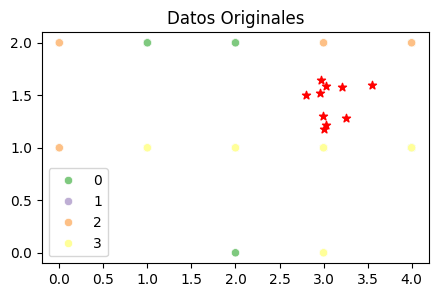

In [36]:
# Datos Originales
plt.figure(figsize = (5,3))

# Datos Originales con etiqueta real
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")

# Centros de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], color = "red", marker = "*")

plt.title("Datos Originales")
plt.show()

In [49]:
from collections import Counter

Counter(y)

Counter({np.int64(2): 350, np.int64(3): 290, np.int64(0): 90, np.int64(1): 19})

In [51]:
Counter(y_train)
Counter(y_test)

Counter({np.int64(2): 71, np.int64(3): 58, np.int64(0): 19, np.int64(1): 2})

In [53]:
from sklearn.neighbors import NearestCentroid

In [54]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

NearestCentroid()

In [55]:
predictions = model.predict(X_test)

predictions

array([3, 0, 1, 3, 2, 0, 2, 0, 1, 3, 0, 2, 3, 3, 2, 2, 0, 2, 3, 3, 0, 1,
       3, 0, 1, 0, 0, 3, 1, 3, 3, 0, 0, 1, 3, 1, 2, 1, 2, 1, 2, 3, 0, 2,
       3, 0, 2, 3, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 1, 1, 2, 3, 0, 2, 1, 3,
       0, 1, 3, 3, 0, 3, 2, 1, 3, 0, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 0, 1,
       0, 0, 3, 1, 1, 1, 1, 3, 1, 0, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 0, 1,
       0, 3, 3, 0, 0, 2, 3, 1, 0, 2, 3, 0, 0, 2, 1, 2, 0, 0, 3, 3, 1, 2,
       3, 2, 1, 3, 3, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1])

Para sacar las métricas:

In [56]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.3010817307692308
Accuracy: 0.5866666666666667
Precisión: 0.42507031524668937
Sensibilidad: 0.432271030904118
F1-score: 0.4272707357813741


In [60]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[10,  2,  5],
       [ 0,  0,  1],
       [ 9,  0, 45]])

In [61]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      0.435     0.526     0.476        19
           1      0.000     0.000     0.000         2
           2      0.643     0.634     0.638        71
           3      0.623     0.569     0.595        58

    accuracy                          0.587       150
   macro avg      0.425     0.432     0.427       150
weighted avg      0.600     0.587     0.592       150



Ahora, tenemos que sacar los centroides del modelo y aplicarle su escala original

In [66]:
model_centroids = model.centroids_

In [ ]:
#Para su escala original
centroids = x_scaler.inverse_transform(model.centroids_)
centroids

array([[5.00000000e+04, 7.00000000e+04, 2.78873239e+00, 1.63380282e+00,
        3.67281690e+02, 6.95070423e+01, 8.13098592e+01, 4.07042254e+00,
        6.00000000e+04],
       [4.41176471e+04, 6.41176471e+04, 3.23529412e+00, 1.58823529e+00,
        4.35529412e+02, 6.15882353e+01, 8.48823529e+01, 3.17647059e+00,
        5.41176471e+04],
       [4.39784946e+04, 6.39784946e+04, 3.02867384e+00, 1.48028674e+00,
        3.43025090e+02, 6.41648746e+01, 8.13906810e+01, 3.85304659e+00,
        5.39784946e+04],
       [4.74137931e+04, 6.74137931e+04, 3.10344828e+00, 1.34051724e+00,
        3.75301724e+02, 6.10818966e+01, 6.89612069e+01, 4.18965517e+00,
        5.74137931e+04]])

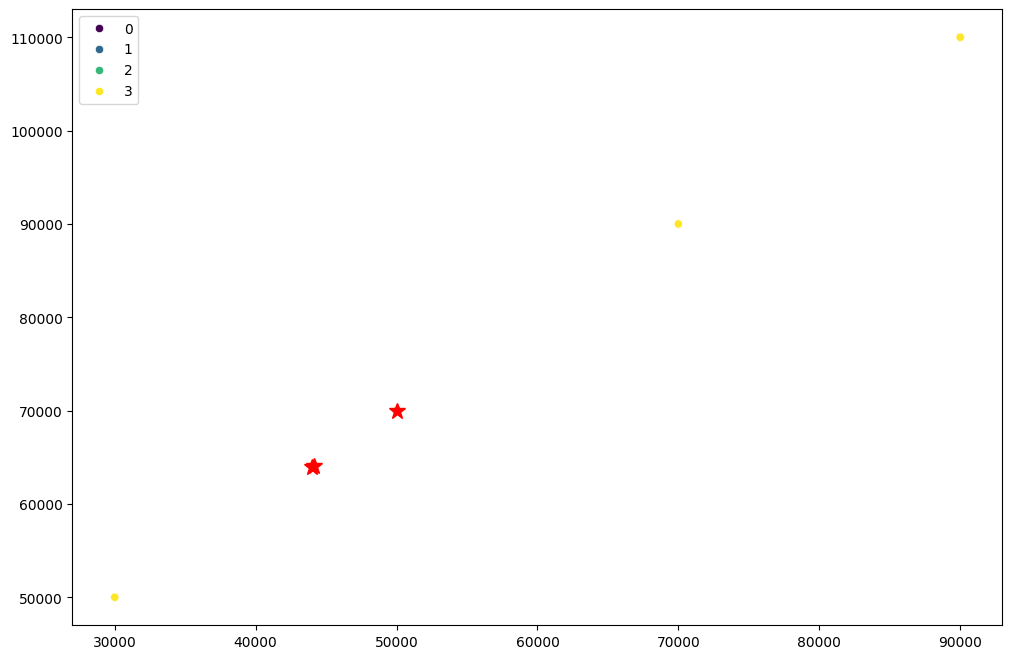

In [68]:
a, b = 0, 1

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X[:, a], y = X[:, b], hue = y, palette = "viridis")

plt.plot(centroids[0][a], centroids[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(centroids[1][a], centroids[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(centroids[2][a], centroids[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

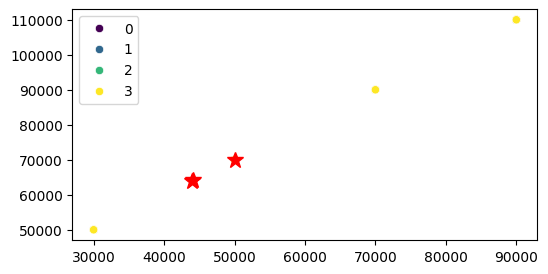

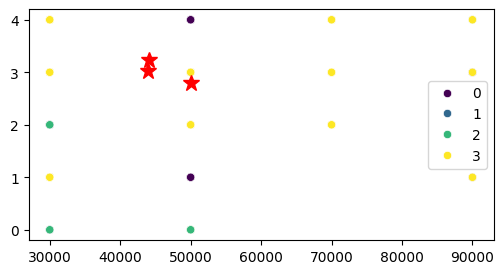

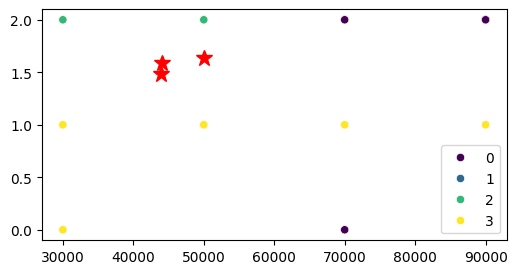

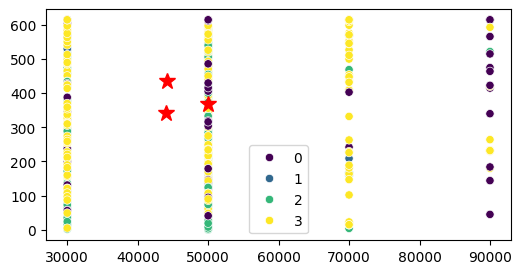

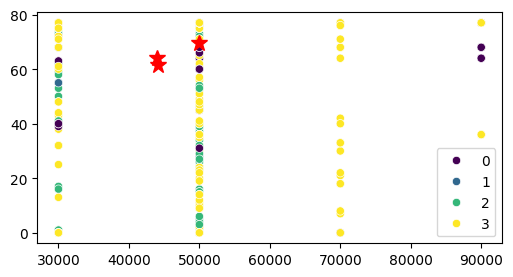

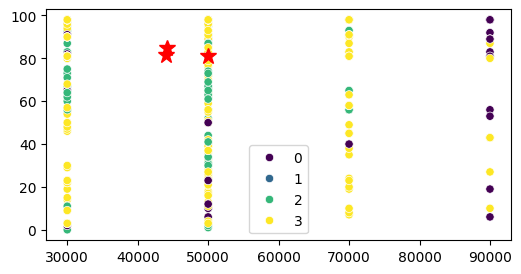

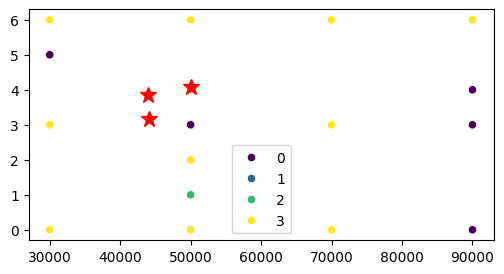

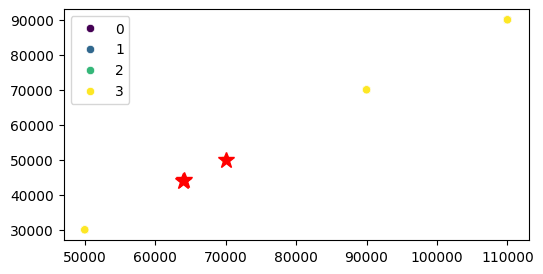

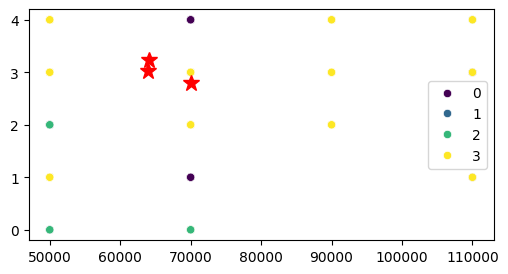

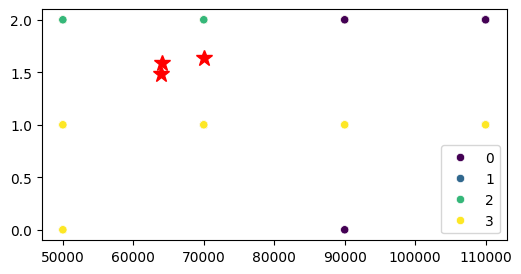

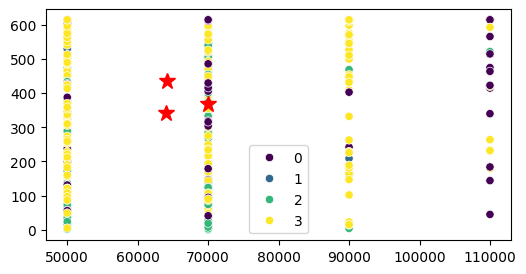

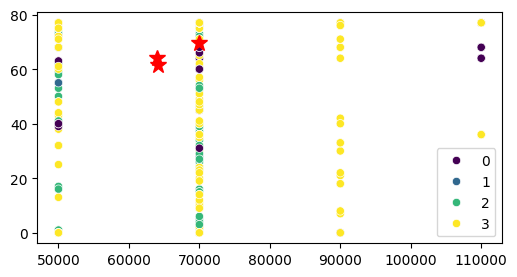

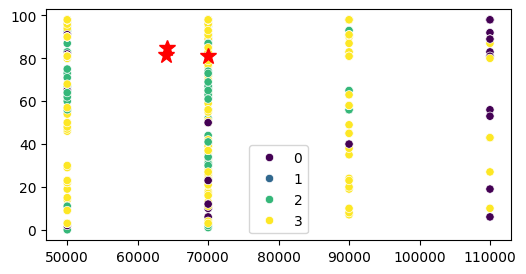

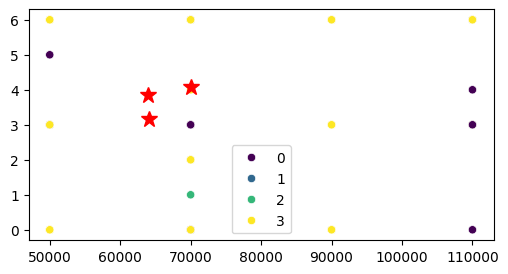

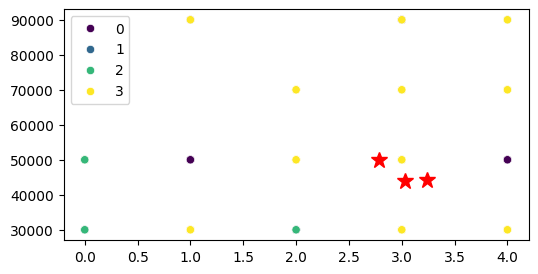

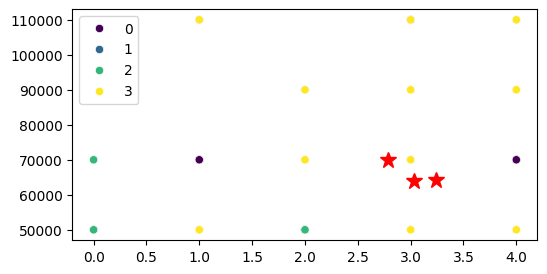

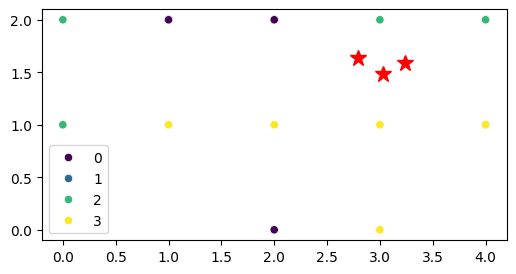

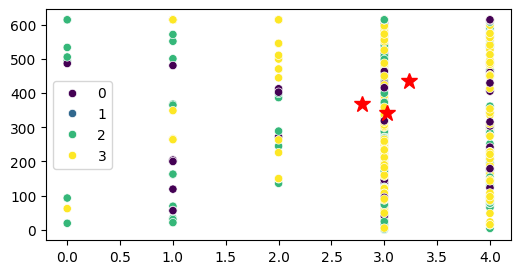

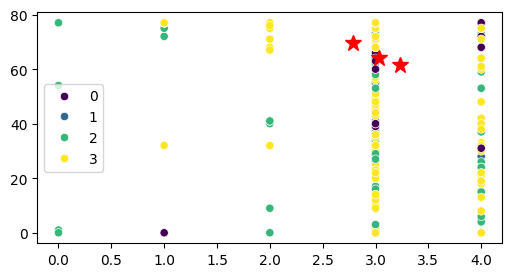

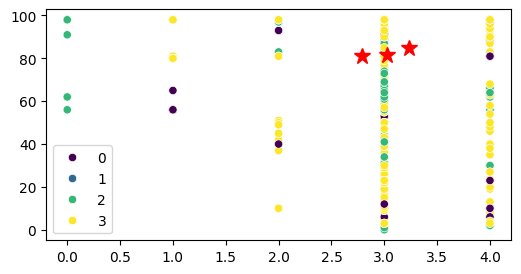

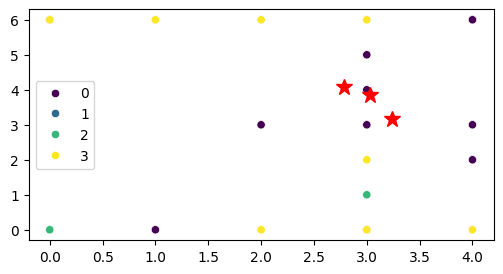

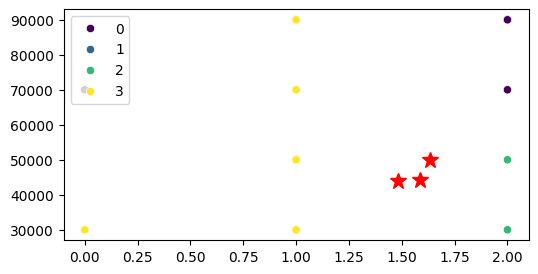

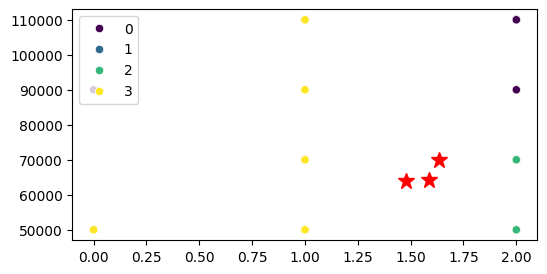

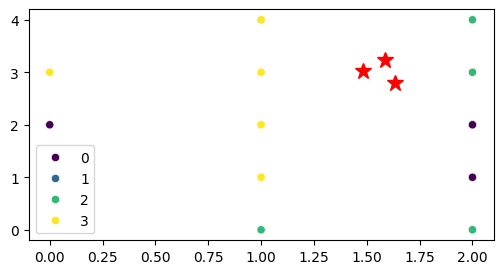

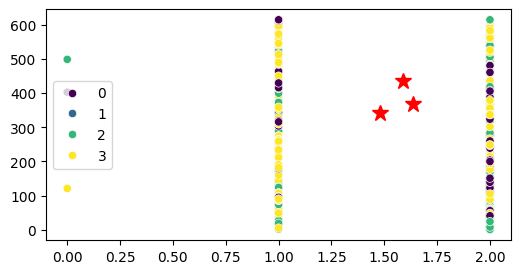

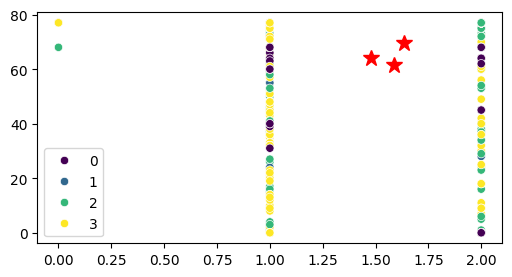

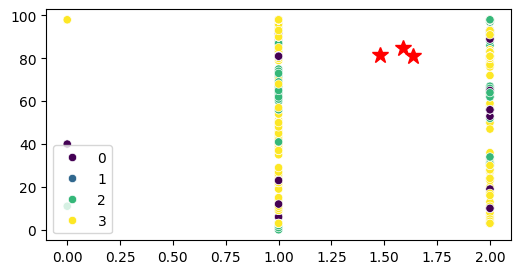

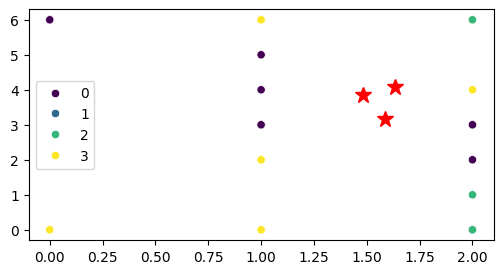

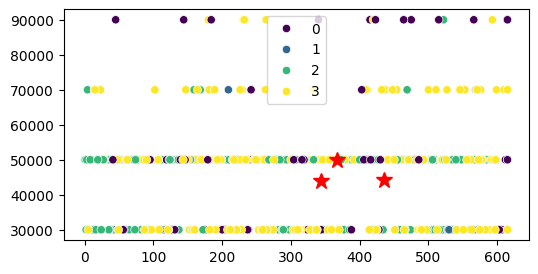

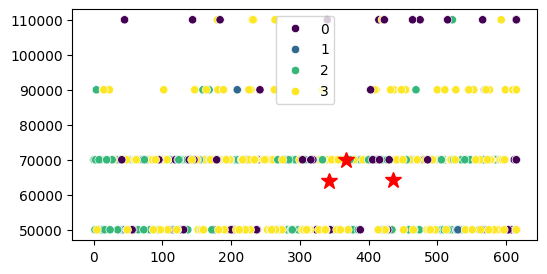

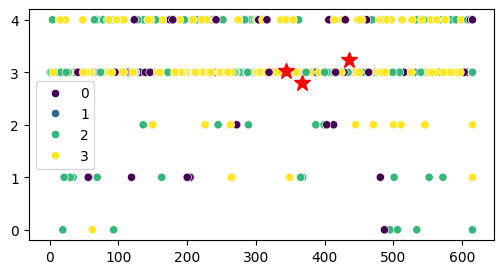

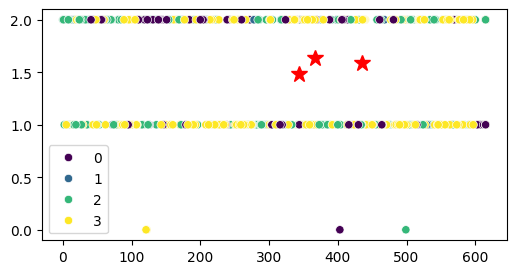

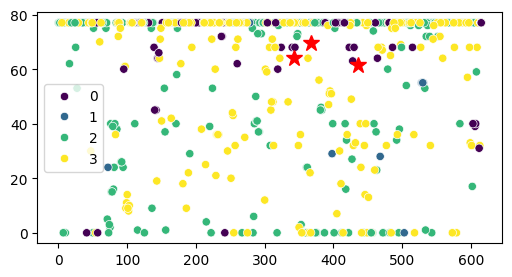

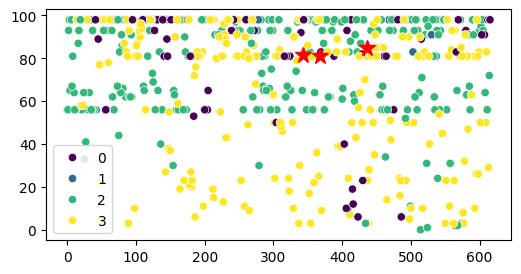

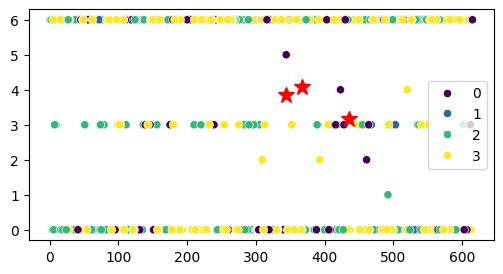

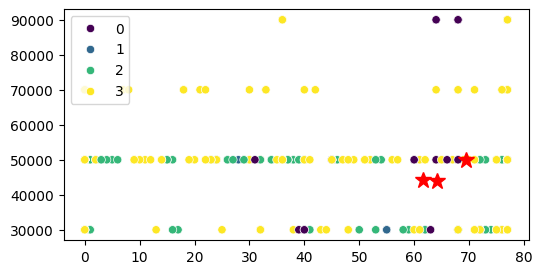

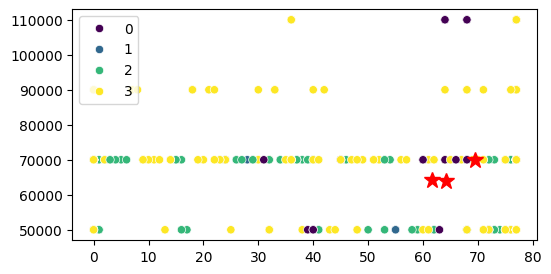

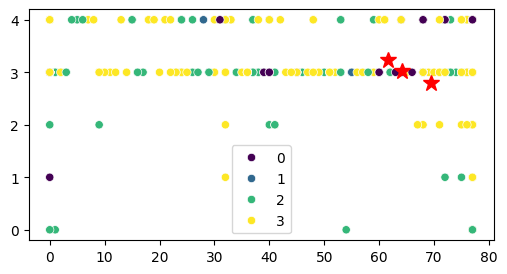

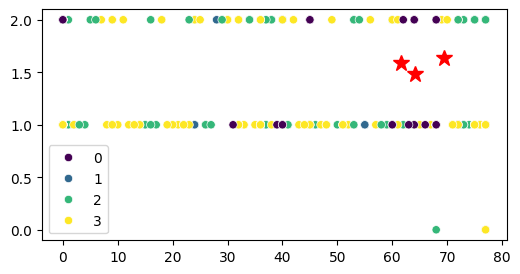

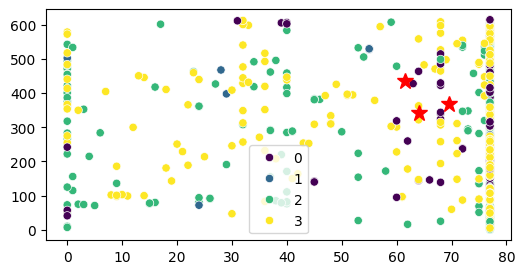

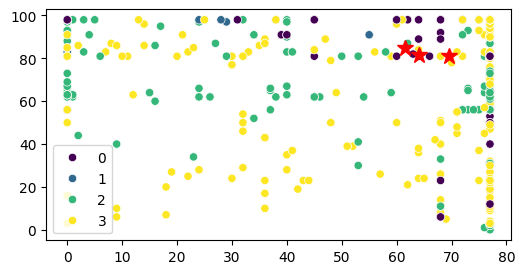

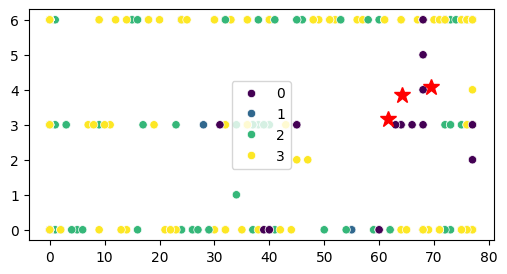

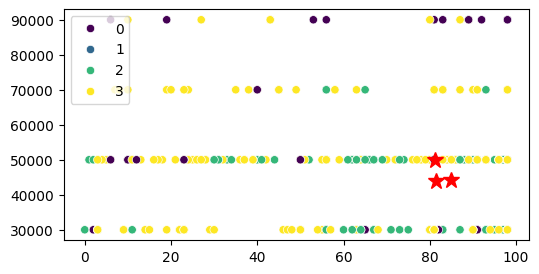

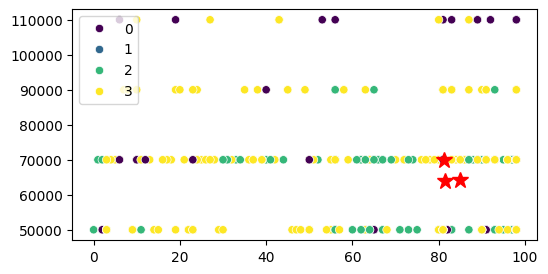

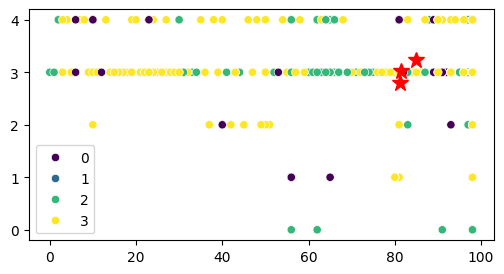

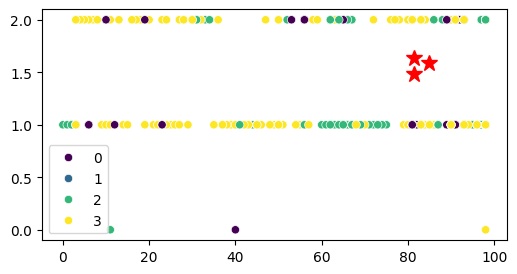

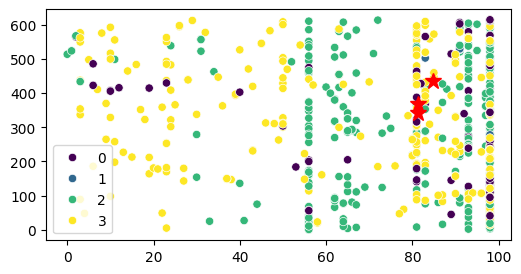

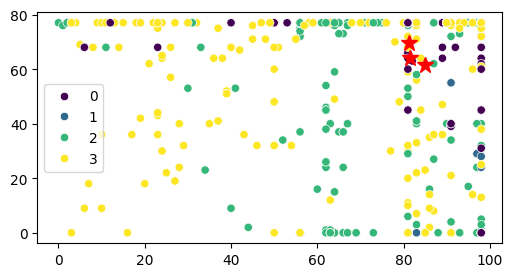

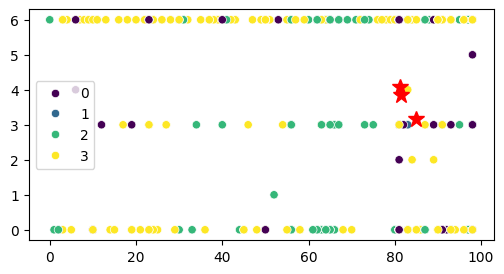

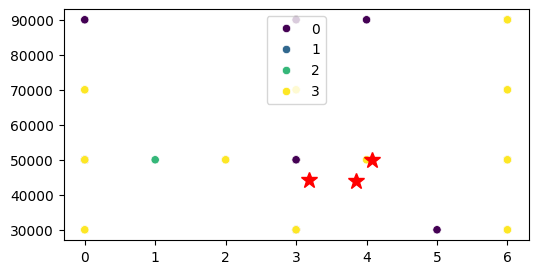

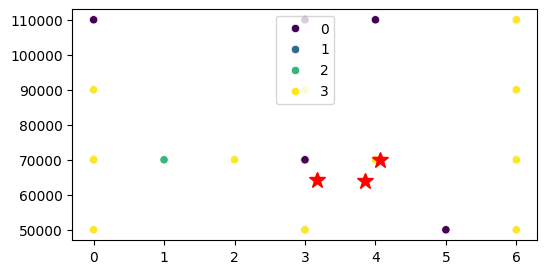

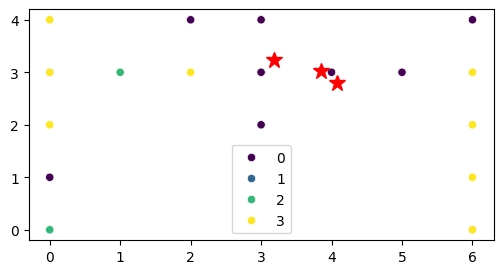

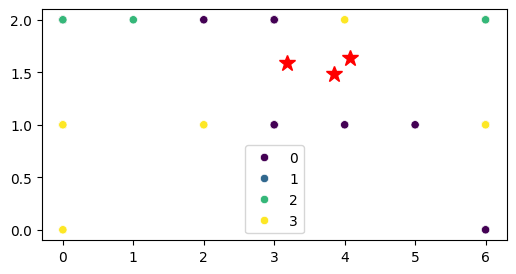

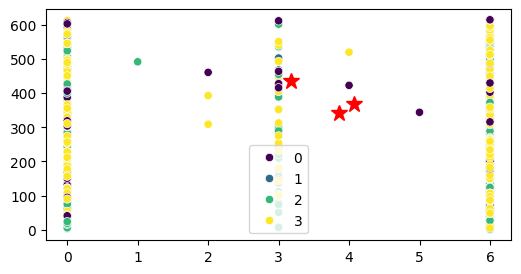

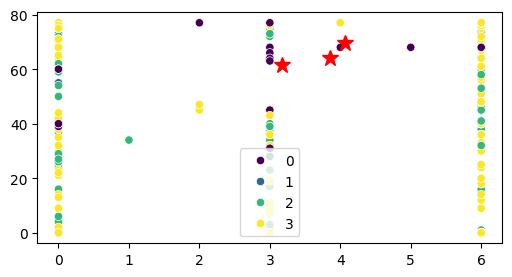

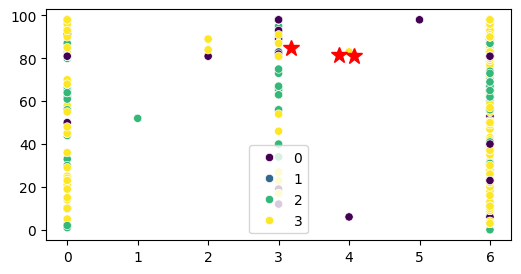

In [78]:
for i in range(8):
    for j in range(8):
        if i != j:

            plt.figure(figsize = (6, 3))

            sns.scatterplot(x = X[:, i], y = X[:, j], hue = y, palette = "viridis")

            plt.plot(centroids[0][i], centroids[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(centroids[1][i], centroids[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(centroids[2][i], centroids[2][j], marker = "*", markersize = 12, color = "red")

            plt.show()